# Setup

In [ ]:
%cd /content/drive/MyDrive/Universita/MLDL/BiseNetv1/

/content/drive/MyDrive/Universita/MLDL/BiseNetv1


In [ ]:
%pwd

'/content/drive/MyDrive/Universita/MLDL/BiseNetv1'

In [ ]:
%load_ext autoreload
%autoreload 2

# Experiments

## Load `classes_info.json`

Load `classes_info.json` which contains information
on how to translate from IDDA classes to CamVid classes

In [ ]:
import json

In [ ]:
classes_info = json.load(open('../IDDA/classes_info.json'))

We create a dictionary which will map from IDDA class
indices to CamVid class indices. 11 will be the void class while 0, ..., 10 are the semantic classes.

In [ ]:
{x[1] for x in classes_info['label2camvid']}

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255}

In [ ]:
camvid_from_idda_index = {arr[0]: (11 if arr[1] == 255 else arr[1]) for arr in classes_info['label2camvid']}
camvid_from_idda_index

{0: 11,
 1: 1,
 2: 4,
 3: 11,
 4: 5,
 5: 3,
 6: 6,
 7: 6,
 8: 7,
 9: 10,
 10: 2,
 11: 11,
 12: 8,
 13: 11,
 14: 11,
 15: 11,
 16: 0,
 17: 11,
 18: 11,
 19: 11,
 20: 9,
 21: 11,
 22: 11,
 23: 11,
 24: 1,
 25: 11,
 26: 11}

## Load a label

In [ ]:
from PIL import Image
import numpy as np

A label has shape: `WIDTH x HEIGHT x RGBA`

In [ ]:
label = Image.open('../IDDA/labels/@277323.612@110521.433@Town10@ClearNoon@audi@1608415805@0.9993073186054318@0.9989705522184156@3.1451809406280518@320128@.png')
label = np.array(label)
label.shape

(1080, 1920, 4)

Inside RGBA, which is a 4-long vector we have got our
classes information. The class index is indide the R (red) channel while the rest contains no information.

Therefore we drop all channels except for R, obtaining
a `WIDTH x HEIGHT` array.

In [ ]:
assert np.all(label[:, :, 3] == 255)
assert np.all(label[:, :, 2] == 0)
assert np.all(label[:, :, 1] == 0)
assert np.all((label[:, :, 0] >= 0) & (label[:, :, 0] <= 26))
label = label[:, :, 0]
label.shape

(1080, 1920)

In [ ]:
label

array([[20, 20, 20, ...,  9,  9, 20],
       [20, 20, 20, ..., 20, 20, 20],
       [20, 20, 20, ..., 20, 20, 20],
       ...,
       [ 7,  7,  7, ...,  7,  7,  7],
       [ 7,  7,  7, ...,  7,  7,  7],
       [ 7,  7,  7, ...,  7,  7,  7]], dtype=uint8)

Then we can actually perform the class conversion, applying our dictionary `camvid_from_idda_index` to each pixel of the label

In [ ]:
func = np.vectorize(camvid_from_idda_index.__getitem__)
label_with_camvid_indices = func(label)
label_with_camvid_indices

array([[ 9,  9,  9, ..., 10, 10,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       ...,
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6]])

Finally we go from CamVid indices to a One-Hot encoded class representation

In [ ]:
# Credit goes to https://stackoverflow.com/a/36960495
def onehot_initialization_v2(a):
    ncols = a.max()+1
    out = np.zeros( (a.size,ncols), dtype=np.uint8)
    out[np.arange(a.size),a.ravel()] = 1
    out.shape = a.shape + (ncols,)
    return out

In [ ]:
label_with_camvid_onehot = onehot_initialization_v2(label_with_camvid_indices)
label_with_camvid_onehot

array([[[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
label_with_camvid_onehot.shape

(1080, 1920, 12)

# CamVid stuff

In [ ]:
from dataset.CamVid import CamVid

In [ ]:
dataset = CamVid(
    image_path=['../CamVid/train/', '../CamVid/val/'],
    label_path=['../CamVid/train_labels/', '../CamVid/val_labels/'],
    csv_path='../CamVid/class_dict.csv',
    scale=(720, 960),
    mode='train'
)

In [ ]:
len(dataset)

468

In [ ]:
img, label = dataset[12]

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [ ]:
img.shape

torch.Size([3, 720, 960])

In [ ]:
label.shape

torch.Size([12, 720, 960])

## CamVid plotting

In [ ]:
import matplotlib.pyplot as plt
from torchvision import transforms as T
import torch

In [ ]:
mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)
unnormalize = T.Normalize((-mean/std).tolist(), (1.0 / std).tolist())

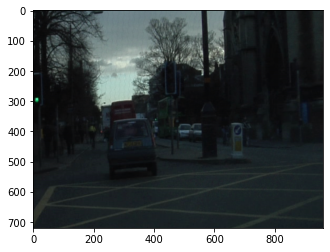

In [ ]:
plt.imshow(
    T.Compose([
      unnormalize,
      T.ToPILImage()
    ])(img)
)

In [ ]:
from utils import reverse_one_hot, colour_code_segmentation

In [ ]:
colour_code_segmentation(reverse_one_hot(label).numpy(), dataset.label_info).shape

(720, 960, 3)

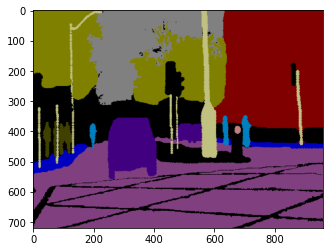

In [ ]:
plt.imshow(colour_code_segmentation(reverse_one_hot(label).numpy(), dataset.label_info))

# IDDA Loader

In [ ]:
%load_ext autoreload
%autoreload 2
from dataset import IDDA
dataset_IDDA = IDDA.IDDA(
    image_path='../IDDA/rgb/',
    label_path='../IDDA/labels',
    classes_info_path='../IDDA/classes_info.json',
    scale=(720, 960),
    mode='train'
)

assert len(dataset_IDDA) == 3379
assert len(dataset_IDDA.image_list) == 3379
assert len(dataset_IDDA.label_list) == 3379


img_IDDA, label_IDDA = dataset_IDDA[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


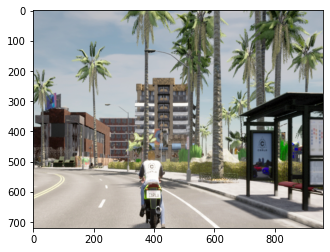

In [ ]:
plt.imshow(
    T.Compose([
      unnormalize,
      T.ToPILImage()
    ])(img_IDDA)
)

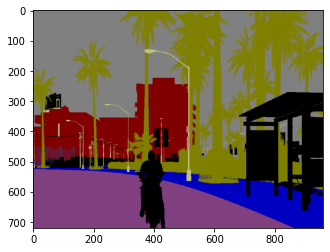

In [ ]:
plt.imshow(colour_code_segmentation(reverse_one_hot(label_IDDA).numpy(), dataset.label_info))

# Check that semantic classes match between CamVid and IDDA

In [ ]:
import pandas as pd

In [ ]:
camvid_labels = pd.read_csv('../CamVid/class_dict.csv').query('class_11 == 1')['name'].reset_index(drop=True)
camvid_labels.loc[11] = 'Void'
camvid_labels

0       Bicyclist
1        Building
2             Car
3     Column_Pole
4           Fence
5      Pedestrian
6            Road
7        Sidewalk
8      SignSymbol
9             Sky
10           Tree
11           Void
Name: name, dtype: object

In [ ]:
print(f"|{'IDDA':>16} | {'CamVid':>16}|")
print("+-----------------------------------+")
for k,v in camvid_from_idda_index.items():
  print(f"|{classes_info['label'][k]:>16} | {camvid_labels.iloc[v].lower():>16}|")

|            IDDA |           CamVid|
+-----------------------------------+
|       unlabeled |             void|
|        building |         building|
|           fence |            fence|
|           other |             void|
|      pedestrian |       pedestrian|
|            pole |      column_pole|
|        roadline |             road|
|            road |             road|
|        sidewalk |         sidewalk|
|      vegetation |             tree|
|             car |              car|
|            wall |             void|
|           tsign |       signsymbol|
|          tlight |             void|
|       guardrail |             void|
|         dynamic |             void|
|         bicycle |        bicyclist|
|      motorcycle |             void|
|           rider |             void|
|         terrain |             void|
|             sky |              sky|
|       railtrack |             void|
|          ground |             void|
|         statics |             void|
|          b

## Plot images

In [ ]:
dataset_IDDA = IDDA.IDDA(
    image_path='../IDDA/rgb/',
    label_path='../IDDA/labels',
    classes_info_path='../IDDA/classes_info.json',
    scale=(720, 960),
    mode='train'
)

assert len(dataset_IDDA) == 3379
assert len(dataset_IDDA.image_list) == 3379
assert len(dataset_IDDA.label_list) == 3379

dataset_CamVid = CamVid(
    image_path=['../CamVid/train/', '../CamVid/val/'],
    label_path=['../CamVid/train_labels/', '../CamVid/val_labels/'],
    csv_path='../CamVid/class_dict.csv',
    scale=(720, 960),
    mode='train'
)

assert len(dataset_CamVid) == 468
assert len(dataset_CamVid.image_list) == 468
assert len(dataset_CamVid.label_list) == 468

361


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


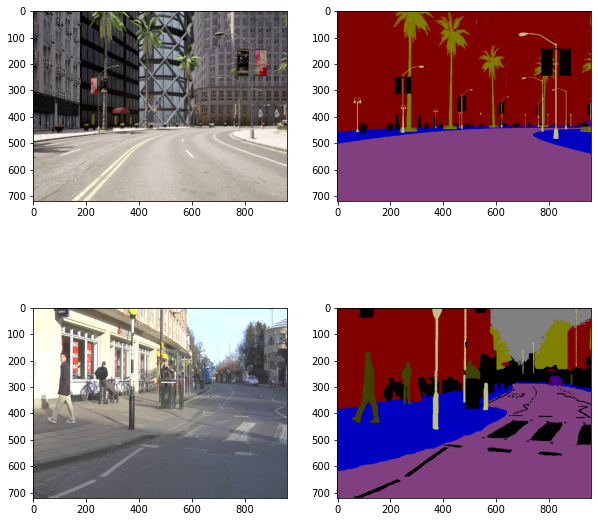

In [ ]:
i = np.random.randint(400)
print(i)
img_IDDA, label_IDDA = dataset_IDDA[i]
img_CamVid, label_CamVid = dataset_CamVid[i]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.imshow(
  T.Compose([
    unnormalize,
    T.ToPILImage()
  ])(img_IDDA)
)

ax2.imshow(colour_code_segmentation(reverse_one_hot(label_IDDA).numpy(), dataset.label_info))

ax3.imshow(
  T.Compose([
    unnormalize,
    T.ToPILImage()
  ])(img_CamVid)
)

ax4.imshow(colour_code_segmentation(reverse_one_hot(label_CamVid).numpy(), dataset.label_info))

## Verify that labels match

In [ ]:
label_IDDA.shape

torch.Size([12, 720, 960])

In [ ]:
label_IDDA[:, 600, 200]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
np.argmax(label_IDDA[:, 600, 200])

tensor(6)

In [ ]:
label_CamVid.shape

torch.Size([12, 720, 960])

In [ ]:
label_CamVid[:, 600, 200]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
np.argmax(label_CamVid[:, 600, 200])

tensor(6)